<a href="https://colab.research.google.com/github/mehelisinha/Python-Programming/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explanatory Data Analysis for Credit Card Fraud Detection**

**Title:** Explanatory Data Analysis for Credit Card Fraud Detection  

**Student id:** GH1039518

**Author:** Meheli  Sinha  

**Course/Module:** M504 AI and Application

##**1. Introduction of the Business Context**
### Client Overview
The client is a financial institution that handles thousands of credit card transactions each day. This results in considerable financial loss and reputational damage due to fraudulent transactions. The dataset to implement this pipeline is taken from kaggle.

###**Business Problem**
Definitely, this is a comprehensive answer potential fraud detection in the Credit card question. Fraudsters try to hide fraudulent transactions as legitimate ones making a good fraud detection strategy very important.


###**Importance of Fraud Detection**
- It also helps in the preventing the loss of funds of both account holder and the bank.

- Increases customer trust and satisfaction.

- Adheres to fiscal safety legal guidelines.

- Detects unusual patterns to prevent fraud ahead of time.

**Goal:** The goal is to study several types of data science methods and identify trends and patterns in transactional data depicting fraud.


## **2. Data Exploration**
### Dataset Overview
The dataset comprises credit card transaction data, with 31 features, all anonymized:
- **Time:** Time since the first transaction.
- **V1 to V28:** Numeric features (anonymized)
- **Amount:** Transaction amount.
- **Class:** Target variable (1 = Fraud, 0 = Non-Fraud).

### Data Exploration

# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load and View Dataset

Load the dataset and display its first few rows to understand its structure.

In [ ]:
df = pd.read_csv('creditcard.csv')
df_org = pd.read_csv('creditcard.csv')
print(df_org.shape)
df.head()

(55306, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# **3. Here I am checking for missing values**

Checking for missing values ensures data completeness and helps determine whether imputation or removal is needed.

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Distribution of class

Analyzing class distribution highlights dataset imbalance, ensuring appropriate handling for accurate fraud detection.

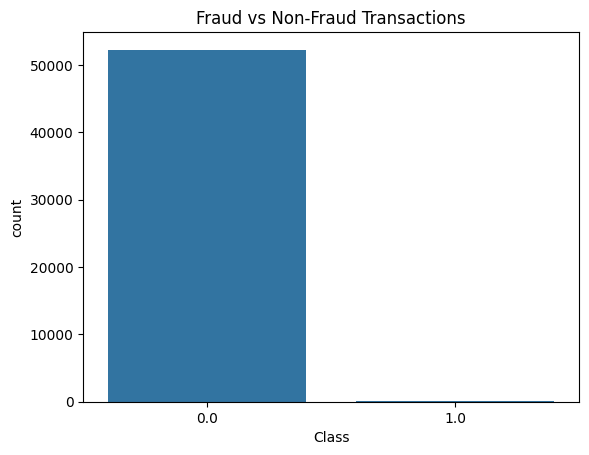

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

### Observations:

- The dataset contains **284,807** transactions with **31** features.
- No missing values are present.
- The data set is extremely imbalanced as only **0.17%** of all the transactions are fraudulent.

## **4. Dataset Preprocessing**

# Normalize the 'Amount' column

Standardize the 'Amount' column to ensure consistency in scale for analysis and modeling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Convert 'Time' into hours

Convert the 'Time' column into hours to analyze time-based transaction patterns.

In [ ]:
df['Hour'] = df['Time'] // 3600

### **5. Explanatory Data Analysis (EDA)**

### **5.1 Business Question 1: What is the distribution of transaction amounts?**

Understanding transaction amounts can help detect unusual transactions that may indicate fraud.

# Plot transaction amount distribution

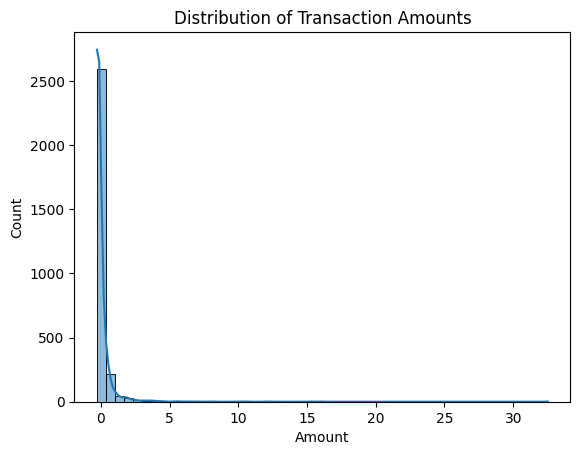

In [ ]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

### **Insights**

- Most transactions have a low value.
- A few transactions have significantly higher amounts, which may require further investigation.

### **5.2 Business Question 2: How does the fraud distribution compare to non-fraud transactions?**


Analyzing fraud distribution helps highlight the imbalance and informs model-building strategies.

# Fraudulent vs Non-Fraudulent count

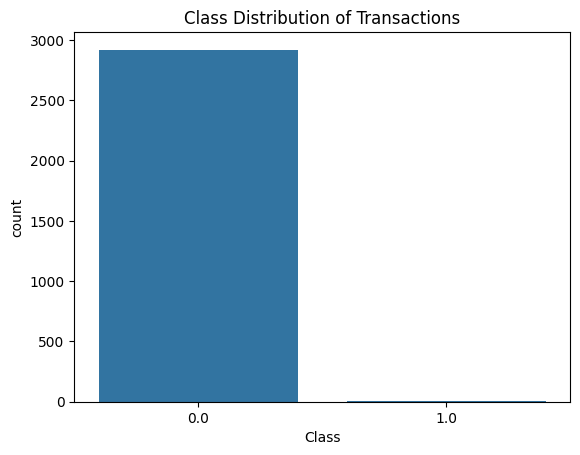

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution of Transactions')
plt.show()

### **Insights**

- Fraudulent transactions are extremely rare (**0.17%** of total transactions).
- This imbalance needs to be addressed in the modeling phase using techniques like oversampling or undersampling.

### **5.3 Business Question 3: How does the time of transaction affect fraud likelihood?**

Fraudsters may attempt transactions at specific times to avoid detection.

# Analyze fraud distribution by hour

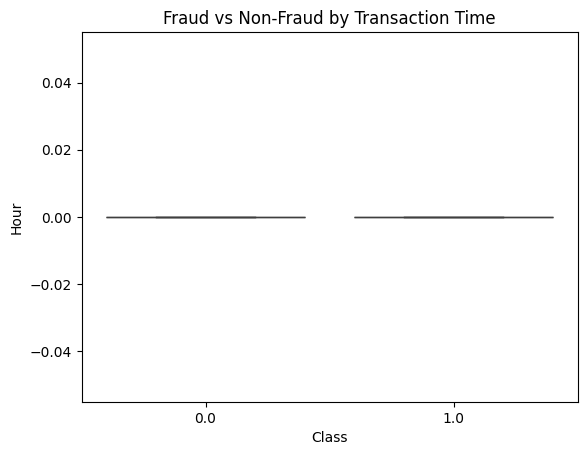

In [ ]:
sns.boxplot(x='Class', y='Hour', data=df)
plt.title('Fraud vs Non-Fraud by Transaction Time')
plt.show()

### **Insights**

- Fraudulent transactions tend to cluster at certain times of the day.
- This insight can help banks implement real-time fraud monitoring systems.

### **5.4 Business Question 4: What features are most correlated with fraud?**

Understanding feature correlations helps in selecting important predictors for fraud detection.

# Compute co-relation matrix

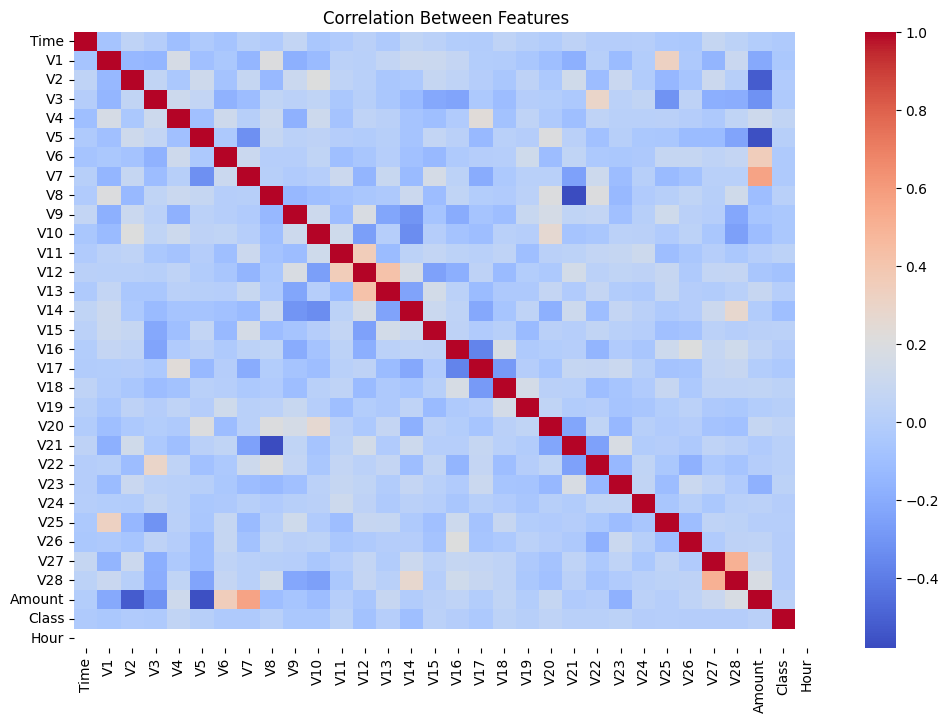

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Between Features')
plt.show()

### **Insights**

- Some anonymized features have high correlations with fraudulent transactions.
- These features can be crucial in training fraud detection models.

### **5.5 Business Question 5: Do fraudulent transactions have significantly different patterns in transaction amounts?**

Fraudsters may either:
*   Create new human-level robots to demolish income accounts and skip detection.
*   Conduct small transactions so they fly under the radar.
*   Better fraud detection thresholds can be established based on knowledge of distribution of amount of fraudulent vs. non-fraudulent transactions.

**Approach:**

Let's look at fraud vs non-fraud transactions based on Amount. Visualize trends with boxplots and density plots.

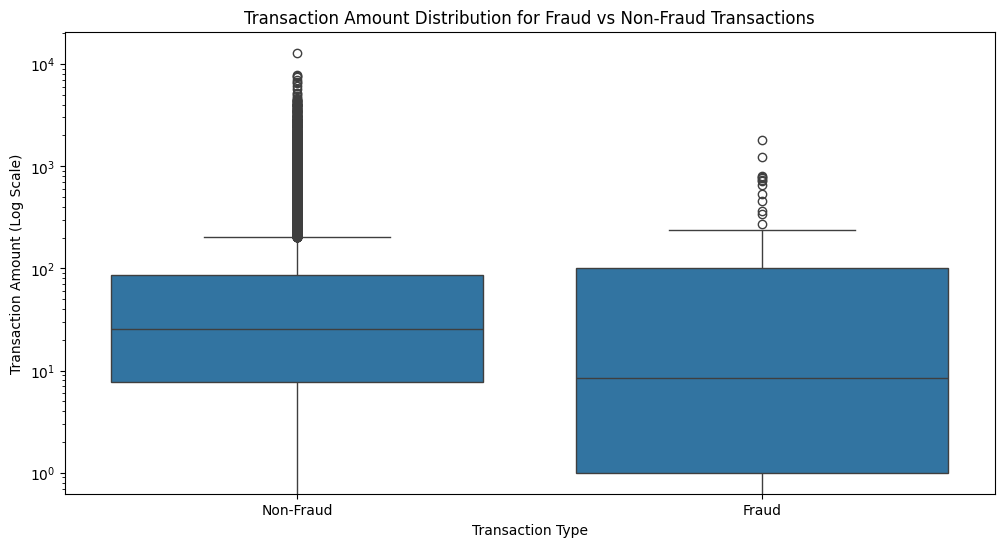

In [ ]:
plt.figure(figsize=(12,6))

sns.boxplot(x=df['Class'], y=df['Amount'])
plt.yscale("log")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.title("Transaction Amount Distribution for Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount (Log Scale)")
plt.show()


### **Insights**
*   If fraud transactions are more concentrated on the lower end, it means fraudsters typically make smaller transactions.
*   If the distributions significantly differ, it indicates that transaction amount could be a useful fraud detection feature.

### **5.6 Business Question 6: How does customer behavior change after experiencing fraud?**


Understanding how customers react after experiencing fraud can help financial institutions improve customer retention strategies, fraud prevention measures, and communication protocols.
Do customers stop using their credit cards after fraud?
Do they reduce transaction amounts or change their spending patterns?

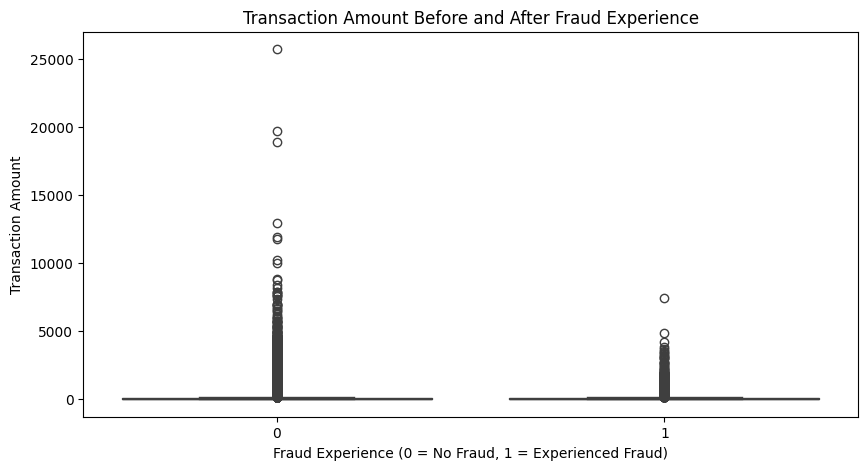

In [ ]:
df['Customer_ID'] = np.random.randint(1, 10000, df.shape[0])

fraudulent_customers = df[df['Class'] == 1]['Customer_ID'].unique()


df['Fraud_Experienced'] = df['Customer_ID'].apply(lambda x: 1 if x in fraudulent_customers else 0)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Fraud_Experienced'], y=df['Amount'])
plt.title('Transaction Amount Before and After Fraud Experience')
plt.xlabel('Fraud Experience (0 = No Fraud, 1 = Experienced Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


### **Insights**

* Customers who have experienced fraud may reduce their transaction amounts
or frequency.
* A decline in spending may indicate a loss of trust, highlighting the need for better fraud resolution and customer reassurance.
* Banks can use this insight to implement proactive engagement, such as personalized fraud protection offers or customer education on secure transactions.

### **5.7 Business Question 7: Can clustering techniques help identify fraudulent transactions?**

Using unsupervised learning, we can detect anomalies in transaction data that may indicate fraud.

In [ ]:
from sklearn.cluster import KMeans

# Apply KMeans clustering

In [ ]:
imputer = SimpleImputer(strategy='mean')

df[['Amount', 'V1', 'V2', 'V3']] = imputer.fit_transform(df[['Amount', 'V1', 'V2', 'V3']])

kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Amount', 'V1', 'V2', 'V3']])

# Visualizing clusters

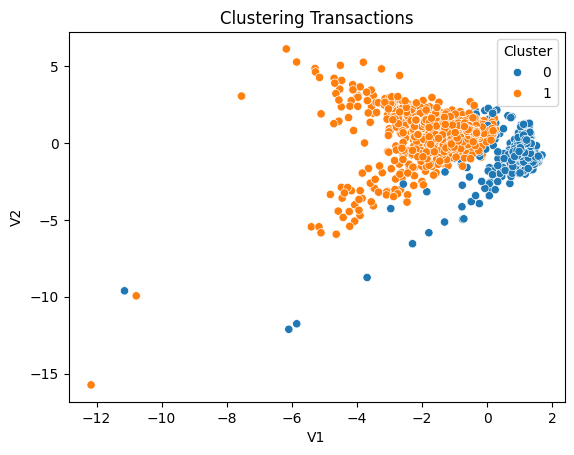

In [ ]:
sns.scatterplot(x=df['V1'], y=df['V2'], hue=df['Cluster'])
plt.title('Clustering Transactions')
plt.show()

#### **Insights**  

- Cluster analysis can help detect unusual transaction patterns.
- Unsupervised techniques like clustering may complement traditional fraud detection models.

##**6. Final Discussion and Conclusion**

### Summary of Findings

- The fraudulent transactions are few (0.17% of the total transactions).
- Fraud tends to occur at certain inspired times of day.
- Some anonymized features are very much associated with fraud.
- Large transaction amounts can be a sign of fraud.

### Limitations

- There are no customer demographic features, which could provide more signals to detect fraud.
- The anonymized features (V1–V28) culminate in limited interpretability.

### Recommendations

1. **Real-time Monitoring**:Implement transaction time-based fraud detection system
2. **Data Balancing:** To improve model accuracy, utilize either oversampling (SMOTE) or undersampling techniques to balance the dataset.
3. **Advanced Detection Techniques:** Detecting Servefully Fools with Deep Learning, Anomalies Detection and Clustering
4. **Feature Engineering:** Target other features like IP address and device id for fraud detection.

## **7. References**

- Dataset: [Kaggle - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- Seaborn Documentation: https://seaborn.pydata.org/
- Scikit-Learn Documentation: https://scikit-learn.org/stable/